In [1]:
from skimage.io import imsave, imread
from skimage import img_as_float
import numpy as np
import matplotlib.pyplot as plt

In [17]:
a = np.zeros( (1080, 1920), dtype=float )

In [28]:
position_1 = np.array( [200,100] ).T
position_2 = np.array( [257,34] ).T 
position_3 = np.array( [20,30] ).T

In [31]:
a[position_1[0], position_1[1]] = 0.5
a[position_2[0], position_2[1]] = 0.5
a[position_3[0], position_3[1]] = 0.5

Text(0.5, 1.0, 'Before')

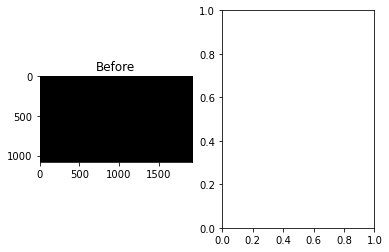

In [53]:
fig, (axis1, axis2) = plt.subplots(1,2)
axis1.imshow(a, cmap='gray')
axis1.set_title('Before')

In [33]:
def arc(position, origo=np.array([0., 0.]), radians=False):
    '''
Returns the angle between the input coordinate and the vertical axis Y
'''
    rho = np.sqrt( (position[0]-origo[0])**2 + (position[1]-origo[1])**2 )
    angle = np.arccos( (position[0]-origo[0]) / rho )
    
    if radians==False:
        angle = angle*180.0/np.pi
        
    return angle



# apply rotation
def rotate(position, angle, origo=np.array([0., 0.]), radians=False):
    theta = angle + arc(position, radians=radians)
    if radians==False:
        theta = theta*(np.pi/180.0)   # convert degree to radians

    rho = np.sqrt((position[0]-origo[0])**2 + (position[1]-origo[1])**2)
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)

    rotated_position = np.rint([x, y]) 
    print([x,y])
    return np.array( [int(rotated_position[0]), int(rotated_position[1])] )

In [58]:
# Rotate the points 20 deg.
pos1_rot = rotate(position_1, 20)
pos2_rot = rotate(position_2, 20)
pos3_rot = rotate(position_3, 20)
print(pos1_rot)
print(pos2_rot)
print(pos3_rot)

[153.7365098246148, 162.3732907437246]
[229.87231866890568, 119.84872594141784]
[8.533248115948108, 35.031181490090624]
[154 162]
[230 120]
[ 9 35]


In [59]:
# Now translate the rotated points
transH = 15
transW = 10

pos1_rot_tra = [pos1_rot[0] + transH, pos1_rot[1] + transW]
pos2_rot_tra = [pos2_rot[0] + transH, pos2_rot[1] + transW]
pos3_rot_tra = [pos3_rot[0] + transH, pos3_rot[1] + transW]
print(pos1_rot_tra)
print(pos2_rot_tra)
print(pos3_rot_tra)

[169, 172]
[245, 130]
[24, 45]


In [38]:
# Uncomment to see the points after both rotation and translation
# a[pos1_rot_tra[0], pos1_rot_tra[1]] = 1
# a[pos2_rot_tra[0], pos2_rot_tra[1]] = 1
# a[pos3_rot_tra[0], pos3_rot_tra[1]] = 1

In [39]:
delH_1 = pos1_rot_tra[0] - position_1[0]
delH_2 = pos2_rot_tra[0] - position_2[0]
delH_3 = pos3_rot_tra[0] - position_3[0]

delW_1 = pos1_rot_tra[1] - position_1[1]
delW_2 = pos2_rot_tra[1] - position_2[1]
delW_3 = pos3_rot_tra[1] - position_3[1]

In [42]:
# Step 1: Take point3 as reference and remove delH and delW:
pos1_detran = ([pos1_rot_tra[0] - delH_3, pos1_rot_tra[1] - delW_3] )
pos2_detran = ([pos2_rot_tra[0] - delH_3, pos2_rot_tra[1] - delW_3] )
pos3_detran = ([pos3_rot_tra[0] - delH_3, pos3_rot_tra[1] - delW_3] )

# Uncomment to see the effect of removing delH, delW
# a[pos1_detran[0], pos1_detran[1]] = 0.75
# a[pos2_detran[0], pos2_detran[1]] = 0.75

In [13]:
# Uncomment to see the effect of removing delH, delW
# a[pos1_detran[0], pos1_detran[1]] = 0.75
# a[pos2_detran[0], pos2_detran[1]] = 0.75

In [43]:
# Step 2: Find the angle between each relocated point and the origin being at the reference point
angle_1= arc(position_1, origo=pos3_detran) - arc(pos1_detran, origo=pos3_detran)
angle_2= arc(position_2, origo=pos3_detran) - arc(pos2_detran, origo=pos3_detran)  

# angle_1= arc(position_1) - arc(pos1_detran)
# angle_2= arc(position_2) - arc(pos2_detran)

print('angle_1: ', angle_1, 'angle_2: ', angle_2)

angle_1:  -19.963382457485178 angle_2:  -20.07058545377756


In [47]:
# Step 3: Derotate
pos1_detran_derot = rotate(pos1_detran, angle_1, origo=pos3_detran) + pos3_detran
pos2_detran_derot = rotate(pos2_detran, angle_2, origo=pos3_detran) + pos3_detran

print(pos3_detran)
print(pos1_detran_derot)
print(pos2_detran_derot)

[176.61426341960015, 77.21011563747385]
[235.71657426284204, 22.443186444666672]
[20, 30]
[197 107]
[256  52]


In [54]:
a[pos1_detran_derot[0], pos1_detran_derot[1]] = 1.0
a[pos2_detran_derot[0], pos2_detran_derot[1]] = 1.0

axis2.imshow(a, cmap='gray')
axis2.set_title('After')
plt.show()